# Issues for GANs on MNIST

### Ununiform distribution in latent space for vanilla GANs

For shallow vanilla GAN with structure:
* Generator: input_100 => fc_128 -> relu => fc_784 -> sigmoid => output_784
* Discriminator: input_784 => fc_128 -> relu => fc_1 -> sigmoid => output_1

the distribution of different digits in the latent space will become more and more ununiform during traininig. After training for around 100 epochs, digits 0, 1, 3, 5 and 8 seem to dominate the latent space, while other digits like 4 and 6 are rarely observed in the output of generator with latent z sampled from a stadard Gaussian distribution as input. Finally only one digit will occupy more than 95% of the latent space:

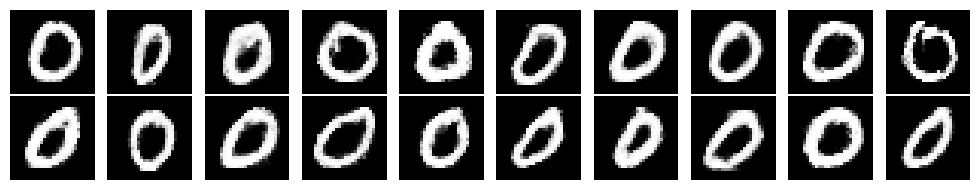

In [3]:
# DON'T RUN THIS CELL
model = models.vanilla('vanilla_000', sample_num=25)
samples = model.generate(sample_num=20)
fig = imtool.gan_grid_plot(samples, show=True, h=2)

This can be remitted by increase the size of hidden layer in both G and D. A vanilla GAN with structure:
* Generator: input_100 => fc_256 -> lrelu => fc_784 -> sigmoid => output_784
* Discriminator: input_784 => fc_256 -> lrelu => fc_1 -> sigmoid => output_1

seems better during training, but the phenomenon is virtually delayed.


---
* What about increase the hidden layer size for only D or G?
* Try to run with leaky ReLU.

In [1]:
# Do some setups
from __future__ import print_function

import random
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path += ['..\\..\\']

import models
from tframe import console
from tframe.utils import imtool

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2